In [4]:
%matplotlib inline

In [6]:
import datetime
import matplotlib.pyplot as plt
from pywoudc import WoudcClient

# connect to WOUDC data service
client = WoudcClient()

# get Brewer data from 2005 to present
begin = datetime.date(2005, 1, 1)
end = datetime.date.today()

data = client.get_data('totalozone',
                       property_name='instrument_name',
                       property_value='brewer',
                       temporal=[begin, end])

len(data['features'])

153770

In [12]:
type(data['features'])

list

In [8]:
data['features'][0]

{u'geometry': {u'coordinates': [15.833, 50.183], u'type': u'Point'},
 u'properties': {u'agency': u'CHMI-HK',
  u'daily_columno3': u'298.8',
  u'daily_columnso2': u'',
  u'daily_date': u'2005-01-02',
  u'daily_mmu': u'3.407',
  u'daily_nobs': u'',
  u'daily_obscode': u'ZS',
  u'daily_stddevo3': u'0.7',
  u'daily_utc_begin': u'10.17',
  u'daily_utc_end': u'11.25',
  u'daily_utc_mean': u'10.48',
  u'daily_wlcode': u'9',
  u'data_payload_id': 237410,
  u'gaw_id': u'HKR',
  u'instance_datetime': u'2005/01/01 00:00:00+00',
  u'instrument_model': u'MKIV',
  u'instrument_name': u'brewer',
  u'instrument_number': u'098',
  u'latest_observation': 0,
  u'monthly_columno3': u'339.4',
  u'monthly_date': u'2005-01-01',
  u'monthly_npts': u'29',
  u'monthly_stddevo3': u'58.4',
  u'platform_id': u'096',
  u'platform_name': u'Hradec Kralove',
  u'platform_type': u'STN',
  u'url': u'https://woudc.org/archive/Archive-NewFormat/TotalOzone_1.0_1/stn096/brewer/2005/20050101.brewer.mkiv.098.chmi-hk.csv'},
 u

In [14]:
property_to_graph = 'daily_stddevo3'

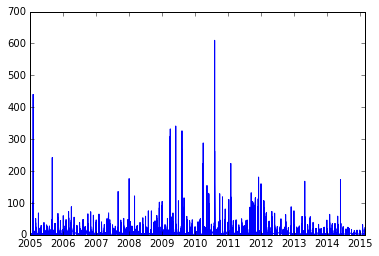

In [15]:
# setup graph axes
x_axis = [datetime.datetime.strptime(x['properties']['instance_datetime'], '%Y/%m/%d %H:%M:%S+00') for x in data['features'] if x['properties'][property_to_graph]]
y_axis = [x['properties'][property_to_graph] for x in data['features'] if x['properties'][property_to_graph]]

# render simple plot
plt.plot(x_axis, y_axis)